# Example 2: Synthetic Nonlinear Dataset
core features = distance from origin, style features = angle

In [2]:
import os
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parent)
sys.path.append(parent_dir)
os.chdir(parent_dir)
import data_handler
import configs
import train
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re
SEED = 7

In [2]:
train_ds, test1_ds, test2_ds = data_handler.load_datasets("synthetic")

2024-05-09 14:35:00.001195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-09 14:35:01.785352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-09 14:35:03.517571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
ids = train_ds['id']
unique, counts = np.unique(ids, return_counts=True)
print("Number of IDs occuring more than once: ", np.sum(counts > 1))

max_occ = np.max(counts)
print("Max occurence of an ID: ", max_occ)

Number of IDs occuring more than once:  500
Max occurence of an ID:  2


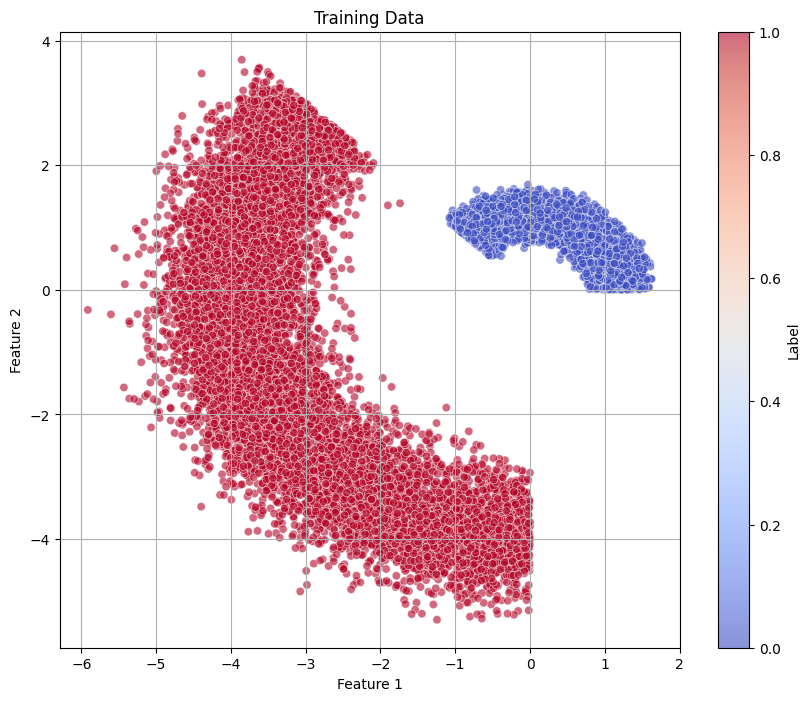

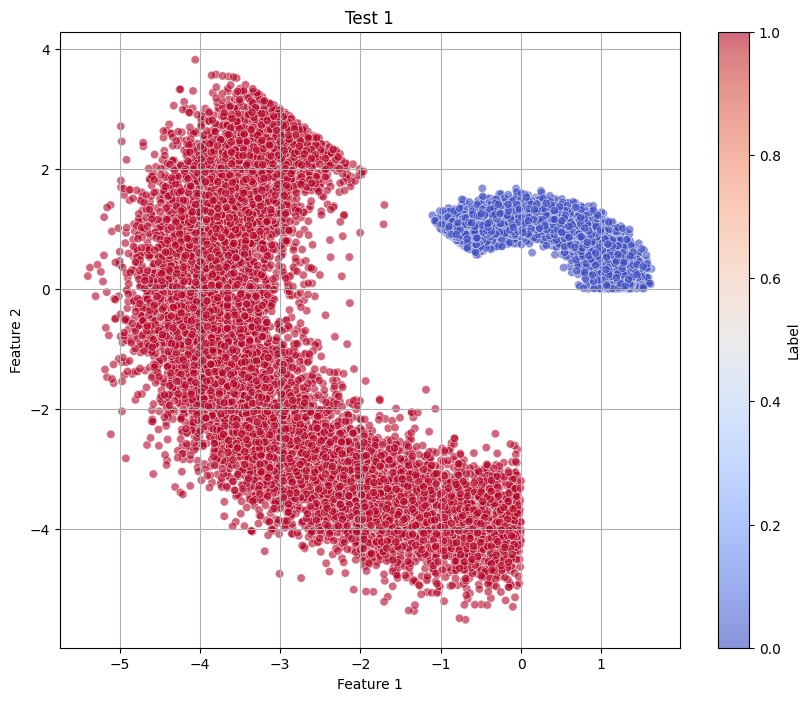

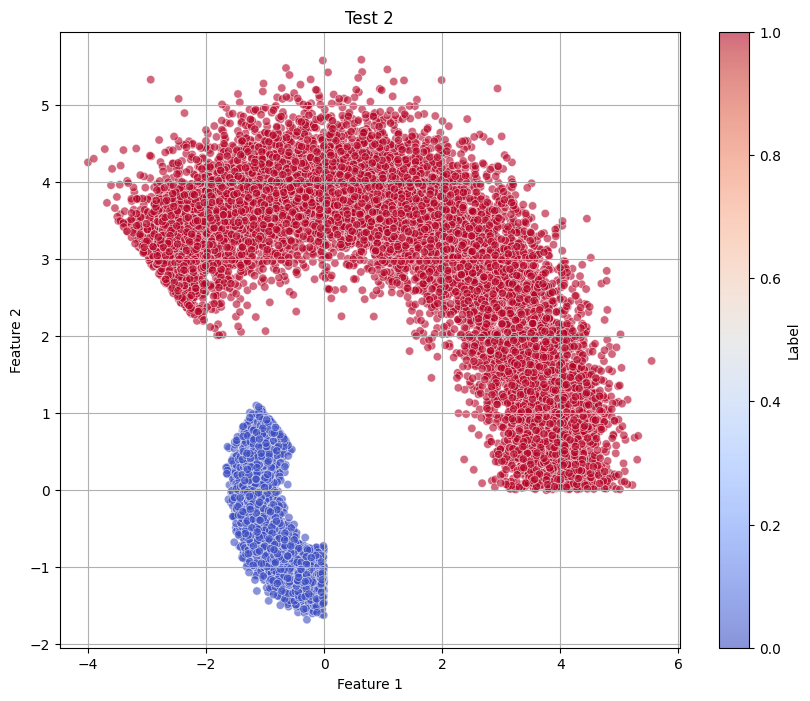

In [18]:
def visualize_data(features_array, labels_array, ids_array=None, title="Data Visualization"):
    features_array = np.array(features_array)
    labels_array = np.array(labels_array)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_array[:, 0], features_array[:, 1], c=labels_array, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter, label='Label')
    
    plt.grid(True)
    plt.savefig(f"figures/{title}.pdf")
    plt.show()

visualize_data(train_ds['image'], train_ds['label'], title="Training Data")
visualize_data(test1_ds['image'], test1_ds['label'], title="Test 1")
visualize_data(test2_ds['image'], test2_ds['label'], title="Test 2")

In [5]:
config = configs.synthetic_experiment()
config.lambda_core = 0.0
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_pooled", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 6.1863, train_accuracy: 98.53, test1_accuracy: 100.00, test2_accuracy: 44.31, core_penalty: 0.5086, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 1.3330, train_accuracy: 99.50, test1_accuracy: 99.43, test2_accuracy: 50.12, core_penalty: 0.0262, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 0.6307, train_accuracy: 97.60, test1_accuracy: 100.00, test2_accuracy: 26.93, core_penalty: 0.0028, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 0.1729, train_accuracy: 99.66, test1_accuracy: 99.11, test2_accuracy: 49.60, core_penalty: 0.0669, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 0.1207, train_accuracy: 99.81, test1_accuracy: 99.93, test2_accuracy: 42.22, core_penalty: 0.0488, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 0.1131, train_accuracy: 99.71, test1_accuracy: 99.89, test2_accuracy: 42.40, core_penalty: 0.0181, val_loss: N/

In [10]:
config = configs.synthetic_experiment()
config.lambda_core = 0.1
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 6.3693, train_accuracy: 97.89, test1_accuracy: 100.00, test2_accuracy: 30.34, core_penalty: 0.5941, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 1.4304, train_accuracy: 99.90, test1_accuracy: 99.13, test2_accuracy: 50.06, core_penalty: 0.0983, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 0.7664, train_accuracy: 97.75, test1_accuracy: 99.97, test2_accuracy: 36.67, core_penalty: 0.0022, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 0.6934, train_accuracy: 96.78, test1_accuracy: 100.00, test2_accuracy: 23.17, core_penalty: 0.0666, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 0.2052, train_accuracy: 99.92, test1_accuracy: 99.68, test2_accuracy: 48.60, core_penalty: 0.0356, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 0.1239, train_accuracy: 99.78, test1_accuracy: 99.97, test2_accuracy: 32.40, core_penalty: 0.0128, val_loss: N/

In [8]:
config = configs.synthetic_experiment()
config.lambda_core = 1.0
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 6.9825, train_accuracy: 95.84, test1_accuracy: 99.17, test2_accuracy: 5.19, core_penalty: 0.2722, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 34.9399, train_accuracy: 98.01, test1_accuracy: 100.00, test2_accuracy: 7.26, core_penalty: 28.1943, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 7.2301, train_accuracy: 99.86, test1_accuracy: 99.99, test2_accuracy: 43.60, core_penalty: 0.0052, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 9.0963, train_accuracy: 98.43, test1_accuracy: 95.74, test2_accuracy: 18.47, core_penalty: 3.4606, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 114.8536, train_accuracy: 96.21, test1_accuracy: 99.48, test2_accuracy: 22.20, core_penalty: 100.1167, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 262.5898, train_accuracy: 92.80, test1_accuracy: 99.89, test2_accuracy: 17.32, core_penalty: 228.1745, val_l

In [7]:
config = configs.synthetic_experiment()
config.lambda_core = 10.0
_ = train.train_and_evaluate(config, workdir=f"results/synthetic_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 16.8879, train_accuracy: 90.22, test1_accuracy: 100.00, test2_accuracy: 9.15, core_penalty: 0.8922, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 107.5437, train_accuracy: 96.76, test1_accuracy: 99.86, test2_accuracy: 56.28, core_penalty: 9.9196, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 8.5868, train_accuracy: 99.14, test1_accuracy: 100.00, test2_accuracy: 43.24, core_penalty: 0.0035, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 20.4130, train_accuracy: 97.10, test1_accuracy: 50.72, test2_accuracy: 49.45, core_penalty: 1.1139, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 2159.7930, train_accuracy: 92.44, test1_accuracy: 100.00, test2_accuracy: 1.44, core_penalty: 213.9900, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 460.5717, train_accuracy: 96.84, test1_accuracy: 100.00, test2_accuracy: 9.80, core_penalty: 43.2151, v

In [1]:
x = """
Lambda=0
INFO:absl:epoch: 1, train_loss: 6.1863, train_accuracy: 98.53, test1_accuracy: 100.00, test2_accuracy: 44.31, core_penalty: 0.5086, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 1.3330, train_accuracy: 99.50, test1_accuracy: 99.43, test2_accuracy: 50.12, core_penalty: 0.0262, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 0.6307, train_accuracy: 97.60, test1_accuracy: 100.00, test2_accuracy: 26.93, core_penalty: 0.0028, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 0.1729, train_accuracy: 99.66, test1_accuracy: 99.11, test2_accuracy: 49.60, core_penalty: 0.0669, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 0.1207, train_accuracy: 99.81, test1_accuracy: 99.93, test2_accuracy: 42.22, core_penalty: 0.0488, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 0.1131, train_accuracy: 99.71, test1_accuracy: 99.89, test2_accuracy: 42.40, core_penalty: 0.0181, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 7, train_loss: 0.2919, train_accuracy: 96.90, test1_accuracy: 99.75, test2_accuracy: 28.04, core_penalty: 0.1081, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 8, train_loss: 0.2598, train_accuracy: 99.87, test1_accuracy: 100.00, test2_accuracy: 31.45, core_penalty: 0.1319, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 9, train_loss: 0.1132, train_accuracy: 99.99, test1_accuracy: 99.96, test2_accuracy: 34.50, core_penalty: 0.0287, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 10, train_loss: 0.0988, train_accuracy: 99.96, test1_accuracy: 99.96, test2_accuracy: 35.85, core_penalty: 0.0214, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 11, train_loss: 0.0977, train_accuracy: 99.93, test1_accuracy: 99.89, test2_accuracy: 41.88, core_penalty: 0.0229, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 12, train_loss: 0.0960, train_accuracy: 99.97, test1_accuracy: 99.56, test2_accuracy: 48.26, core_penalty: 0.0477, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 13, train_loss: 0.0983, train_accuracy: 99.88, test1_accuracy: 98.94, test2_accuracy: 49.30, core_penalty: 0.0188, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 14, train_loss: 0.0967, train_accuracy: 99.86, test1_accuracy: 99.96, test2_accuracy: 38.11, core_penalty: 0.0253, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 15, train_loss: 0.0957, train_accuracy: 99.90, test1_accuracy: 100.00, test2_accuracy: 16.89, core_penalty: 0.0390, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 16, train_loss: 0.0945, train_accuracy: 99.89, test1_accuracy: 100.00, test2_accuracy: 23.40, core_penalty: 0.0142, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 17, train_loss: 0.0941, train_accuracy: 99.89, test1_accuracy: 100.00, test2_accuracy: 28.53, core_penalty: 0.0169, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 18, train_loss: 0.0930, train_accuracy: 99.94, test1_accuracy: 97.92, test2_accuracy: 49.53, core_penalty: 0.0396, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 19, train_loss: 0.1588, train_accuracy: 98.50, test1_accuracy: 100.00, test2_accuracy: 32.92, core_penalty: 0.0897, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 20, train_loss: 0.0937, train_accuracy: 99.97, test1_accuracy: 99.79, test2_accuracy: 44.51, core_penalty: 0.0159, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 21, train_loss: 0.0896, train_accuracy: 99.97, test1_accuracy: 99.95, test2_accuracy: 39.21, core_penalty: 0.0830, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 22, train_loss: 0.0912, train_accuracy: 99.92, test1_accuracy: 99.97, test2_accuracy: 34.08, core_penalty: 0.1218, val_loss: N/A, ids_more_than_once: 0.26
INFO:absl:epoch: 23, train_loss: 0.0891, train_accuracy: 99.95, test1_accuracy: 99.98, test2_accuracy: 31.51, core_penalty: 0.0282, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 24, train_loss: 0.0899, train_accuracy: 99.95, test1_accuracy: 99.94, test2_accuracy: 38.83, core_penalty: 0.0319, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 25, train_loss: 0.0946, train_accuracy: 99.79, test1_accuracy: 99.95, test2_accuracy: 39.85, core_penalty: 0.0322, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 26, train_loss: 0.0889, train_accuracy: 99.94, test1_accuracy: 100.00, test2_accuracy: 25.72, core_penalty: 0.0733, val_loss: N/A, ids_more_than_once: 0.31
INFO:absl:epoch: 27, train_loss: 1.1989, train_accuracy: 94.92, test1_accuracy: 49.67, test2_accuracy: 49.45, core_penalty: 0.0039, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 28, train_loss: 7.8934, train_accuracy: 95.95, test1_accuracy: 100.00, test2_accuracy: 12.01, core_penalty: 1.0630, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 29, train_loss: 2.4651, train_accuracy: 100.00, test1_accuracy: 100.00, test2_accuracy: 19.84, core_penalty: 3.0089, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 30, train_loss: 0.7007, train_accuracy: 100.00, test1_accuracy: 100.00, test2_accuracy: 8.87, core_penalty: 0.3705, val_loss: N/A, ids_more_than_once: 0.13
Lambda=0.1
INFO:absl:epoch: 1, train_loss: 6.3693, train_accuracy: 97.89, test1_accuracy: 100.00, test2_accuracy: 30.34, core_penalty: 0.5941, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 1.4304, train_accuracy: 99.90, test1_accuracy: 99.13, test2_accuracy: 50.06, core_penalty: 0.0983, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 0.7664, train_accuracy: 97.75, test1_accuracy: 99.97, test2_accuracy: 36.67, core_penalty: 0.0022, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 0.6934, train_accuracy: 96.78, test1_accuracy: 100.00, test2_accuracy: 23.17, core_penalty: 0.0666, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 0.2052, train_accuracy: 99.92, test1_accuracy: 99.68, test2_accuracy: 48.60, core_penalty: 0.0356, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 0.1239, train_accuracy: 99.78, test1_accuracy: 99.97, test2_accuracy: 32.40, core_penalty: 0.0128, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 7, train_loss: 0.1190, train_accuracy: 99.81, test1_accuracy: 99.86, test2_accuracy: 43.00, core_penalty: 0.0561, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 8, train_loss: 0.1071, train_accuracy: 99.93, test1_accuracy: 100.00, test2_accuracy: 25.22, core_penalty: 0.0281, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 9, train_loss: 0.1061, train_accuracy: 99.91, test1_accuracy: 99.18, test2_accuracy: 40.80, core_penalty: 0.0245, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 10, train_loss: 0.1051, train_accuracy: 99.83, test1_accuracy: 99.91, test2_accuracy: 43.75, core_penalty: 0.0185, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 11, train_loss: 0.1045, train_accuracy: 99.85, test1_accuracy: 100.00, test2_accuracy: 27.54, core_penalty: 0.0203, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 12, train_loss: 0.1041, train_accuracy: 99.87, test1_accuracy: 98.87, test2_accuracy: 49.37, core_penalty: 0.0429, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 13, train_loss: 0.1016, train_accuracy: 99.87, test1_accuracy: 99.65, test2_accuracy: 47.15, core_penalty: 0.0170, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 14, train_loss: 0.0977, train_accuracy: 99.92, test1_accuracy: 99.97, test2_accuracy: 38.50, core_penalty: 0.0237, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 15, train_loss: 0.1137, train_accuracy: 99.44, test1_accuracy: 100.00, test2_accuracy: 23.45, core_penalty: 0.0365, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 16, train_loss: 0.0976, train_accuracy: 99.96, test1_accuracy: 99.98, test2_accuracy: 33.86, core_penalty: 0.0137, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 17, train_loss: 0.0939, train_accuracy: 99.95, test1_accuracy: 99.90, test2_accuracy: 35.19, core_penalty: 0.0136, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 18, train_loss: 0.0970, train_accuracy: 99.96, test1_accuracy: 99.49, test2_accuracy: 48.51, core_penalty: 0.0356, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 19, train_loss: 0.0976, train_accuracy: 99.91, test1_accuracy: 98.49, test2_accuracy: 48.74, core_penalty: 0.0528, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 20, train_loss: 0.1079, train_accuracy: 99.54, test1_accuracy: 99.75, test2_accuracy: 46.33, core_penalty: 0.0198, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 21, train_loss: 0.0996, train_accuracy: 99.90, test1_accuracy: 99.76, test2_accuracy: 47.91, core_penalty: 0.0678, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 22, train_loss: 0.1027, train_accuracy: 99.77, test1_accuracy: 100.00, test2_accuracy: 13.53, core_penalty: 0.0646, val_loss: N/A, ids_more_than_once: 0.26
INFO:absl:epoch: 23, train_loss: 0.1294, train_accuracy: 98.96, test1_accuracy: 99.97, test2_accuracy: 35.68, core_penalty: 0.0171, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 24, train_loss: 0.0928, train_accuracy: 99.97, test1_accuracy: 100.00, test2_accuracy: 21.95, core_penalty: 0.0166, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 25, train_loss: 0.0901, train_accuracy: 99.96, test1_accuracy: 99.98, test2_accuracy: 32.57, core_penalty: 0.0249, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 26, train_loss: 0.0967, train_accuracy: 99.87, test1_accuracy: 99.89, test2_accuracy: 41.91, core_penalty: 0.0420, val_loss: N/A, ids_more_than_once: 0.31
INFO:absl:epoch: 27, train_loss: 0.0864, train_accuracy: 99.99, test1_accuracy: 99.96, test2_accuracy: 38.97, core_penalty: 0.0027, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 28, train_loss: 0.0987, train_accuracy: 99.73, test1_accuracy: 100.00, test2_accuracy: 23.19, core_penalty: 0.0198, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 29, train_loss: 0.0932, train_accuracy: 99.77, test1_accuracy: 100.00, test2_accuracy: 31.20, core_penalty: 0.0065, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 30, train_loss: 0.0864, train_accuracy: 99.98, test1_accuracy: 99.96, test2_accuracy: 38.45, core_penalty: 0.0013, val_loss: N/A, ids_more_than_once: 0.13
Lambda=1.0
INFO:absl:epoch: 1, train_loss: 6.9825, train_accuracy: 95.84, test1_accuracy: 99.17, test2_accuracy: 5.19, core_penalty: 0.2722, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 34.9399, train_accuracy: 98.01, test1_accuracy: 100.00, test2_accuracy: 7.26, core_penalty: 28.1943, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 7.2301, train_accuracy: 99.86, test1_accuracy: 99.99, test2_accuracy: 43.60, core_penalty: 0.0052, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 9.0963, train_accuracy: 98.43, test1_accuracy: 95.74, test2_accuracy: 18.47, core_penalty: 3.4606, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 114.8536, train_accuracy: 96.21, test1_accuracy: 99.48, test2_accuracy: 22.20, core_penalty: 100.1167, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 262.5898, train_accuracy: 92.80, test1_accuracy: 99.89, test2_accuracy: 17.32, core_penalty: 228.1745, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 7, train_loss: 71.8998, train_accuracy: 96.12, test1_accuracy: 100.00, test2_accuracy: 18.33, core_penalty: 33.0284, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 8, train_loss: 38.4941, train_accuracy: 97.37, test1_accuracy: 100.00, test2_accuracy: 15.62, core_penalty: 5.7419, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 9, train_loss: 37.5117, train_accuracy: 98.16, test1_accuracy: 97.81, test2_accuracy: 49.35, core_penalty: 10.6891, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 10, train_loss: 35.2618, train_accuracy: 98.54, test1_accuracy: 100.00, test2_accuracy: 23.86, core_penalty: 10.3756, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 11, train_loss: 20.9631, train_accuracy: 99.97, test1_accuracy: 100.00, test2_accuracy: 38.32, core_penalty: 0.6354, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 12, train_loss: 23.4621, train_accuracy: 99.76, test1_accuracy: 99.66, test2_accuracy: 49.46, core_penalty: 6.2777, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 13, train_loss: 21.7438, train_accuracy: 98.76, test1_accuracy: 100.00, test2_accuracy: 50.40, core_penalty: 2.4391, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 14, train_loss: 15.8480, train_accuracy: 99.89, test1_accuracy: 100.00, test2_accuracy: 43.97, core_penalty: 0.3077, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 15, train_loss: 12.4200, train_accuracy: 99.99, test1_accuracy: 100.00, test2_accuracy: 48.46, core_penalty: 0.1379, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 16, train_loss: 10.1868, train_accuracy: 100.00, test1_accuracy: 99.99, test2_accuracy: 47.44, core_penalty: 0.0130, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 17, train_loss: 8.8166, train_accuracy: 99.99, test1_accuracy: 99.51, test2_accuracy: 50.95, core_penalty: 0.1587, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 18, train_loss: 8.0915, train_accuracy: 99.89, test1_accuracy: 99.98, test2_accuracy: 48.92, core_penalty: 0.3651, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 19, train_loss: 6.9706, train_accuracy: 99.99, test1_accuracy: 99.75, test2_accuracy: 50.99, core_penalty: 0.2539, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 20, train_loss: 6.3242, train_accuracy: 99.87, test1_accuracy: 100.00, test2_accuracy: 17.47, core_penalty: 0.2541, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 21, train_loss: 5.5542, train_accuracy: 98.58, test1_accuracy: 99.90, test2_accuracy: 52.64, core_penalty: 0.0808, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 22, train_loss: 5.1900, train_accuracy: 99.13, test1_accuracy: 99.80, test2_accuracy: 11.80, core_penalty: 0.2959, val_loss: N/A, ids_more_than_once: 0.26
INFO:absl:epoch: 23, train_loss: 4.3630, train_accuracy: 99.99, test1_accuracy: 100.00, test2_accuracy: 40.92, core_penalty: 0.0521, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 24, train_loss: 3.8591, train_accuracy: 99.99, test1_accuracy: 99.99, test2_accuracy: 49.95, core_penalty: 0.0157, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 25, train_loss: 3.5085, train_accuracy: 99.99, test1_accuracy: 99.96, test2_accuracy: 53.54, core_penalty: 0.0242, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 26, train_loss: 3.2057, train_accuracy: 99.97, test1_accuracy: 99.99, test2_accuracy: 51.44, core_penalty: 0.0237, val_loss: N/A, ids_more_than_once: 0.31
INFO:absl:epoch: 27, train_loss: 2.9158, train_accuracy: 99.99, test1_accuracy: 99.97, test2_accuracy: 48.84, core_penalty: 0.0038, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 28, train_loss: 2.7121, train_accuracy: 99.97, test1_accuracy: 100.00, test2_accuracy: 38.63, core_penalty: 0.0304, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 29, train_loss: 2.4888, train_accuracy: 99.99, test1_accuracy: 99.99, test2_accuracy: 53.53, core_penalty: 0.0112, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 30, train_loss: 2.2929, train_accuracy: 99.99, test1_accuracy: 100.00, test2_accuracy: 44.27, core_penalty: 0.0027, val_loss: N/A, ids_more_than_once: 0.13
Lambda=10.0
INFO:absl:epoch: 1, train_loss: 16.8879, train_accuracy: 90.22, test1_accuracy: 100.00, test2_accuracy: 9.15, core_penalty: 0.8922, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 2, train_loss: 107.5437, train_accuracy: 96.76, test1_accuracy: 99.86, test2_accuracy: 56.28, core_penalty: 9.9196, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 3, train_loss: 8.5868, train_accuracy: 99.14, test1_accuracy: 100.00, test2_accuracy: 43.24, core_penalty: 0.0035, val_loss: N/A, ids_more_than_once: 0.03
INFO:absl:epoch: 4, train_loss: 20.4130, train_accuracy: 97.10, test1_accuracy: 50.72, test2_accuracy: 49.45, core_penalty: 1.1139, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 5, train_loss: 2159.7930, train_accuracy: 92.44, test1_accuracy: 100.00, test2_accuracy: 1.44, core_penalty: 213.9900, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 6, train_loss: 460.5717, train_accuracy: 96.84, test1_accuracy: 100.00, test2_accuracy: 9.80, core_penalty: 43.2151, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 7, train_loss: 3013.0176, train_accuracy: 78.56, test1_accuracy: 92.42, test2_accuracy: 9.13, core_penalty: 295.3995, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 8, train_loss: 1849.3447, train_accuracy: 64.66, test1_accuracy: 95.24, test2_accuracy: 11.44, core_penalty: 178.4499, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 9, train_loss: 783.0289, train_accuracy: 79.51, test1_accuracy: 49.66, test2_accuracy: 49.52, core_penalty: 72.3717, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 10, train_loss: 934.2847, train_accuracy: 77.89, test1_accuracy: 98.53, test2_accuracy: 6.83, core_penalty: 87.5127, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 11, train_loss: 73.0024, train_accuracy: 92.70, test1_accuracy: 99.88, test2_accuracy: 56.16, core_penalty: 1.8805, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 12, train_loss: 93.3971, train_accuracy: 99.69, test1_accuracy: 100.00, test2_accuracy: 63.14, core_penalty: 4.1730, val_loss: N/A, ids_more_than_once: 0.05
INFO:absl:epoch: 13, train_loss: 272.6079, train_accuracy: 77.85, test1_accuracy: 97.33, test2_accuracy: 26.36, core_penalty: 20.6491, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 14, train_loss: 400.0723, train_accuracy: 93.85, test1_accuracy: 94.47, test2_accuracy: 47.95, core_penalty: 33.5679, val_loss: N/A, ids_more_than_once: 0.21
INFO:absl:epoch: 15, train_loss: 628.6370, train_accuracy: 69.90, test1_accuracy: 9.29, test2_accuracy: 94.59, core_penalty: 54.2633, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 16, train_loss: 127.3259, train_accuracy: 78.66, test1_accuracy: 99.53, test2_accuracy: 28.68, core_penalty: 4.6861, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 17, train_loss: 104.3148, train_accuracy: 90.59, test1_accuracy: 10.52, test2_accuracy: 58.82, core_penalty: 4.4531, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 18, train_loss: 218.1216, train_accuracy: 86.76, test1_accuracy: 99.96, test2_accuracy: 51.00, core_penalty: 15.3533, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 19, train_loss: 102.7794, train_accuracy: 94.56, test1_accuracy: 99.57, test2_accuracy: 10.39, core_penalty: 3.8715, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 20, train_loss: 338.6433, train_accuracy: 82.30, test1_accuracy: 5.07, test2_accuracy: 97.77, core_penalty: 26.6713, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 21, train_loss: 602.8776, train_accuracy: 72.79, test1_accuracy: 100.00, test2_accuracy: 3.21, core_penalty: 50.4492, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 22, train_loss: 930.5215, train_accuracy: 57.28, test1_accuracy: 17.08, test2_accuracy: 93.21, core_penalty: 79.6230, val_loss: N/A, ids_more_than_once: 0.26
INFO:absl:epoch: 23, train_loss: 309.0199, train_accuracy: 58.73, test1_accuracy: 96.54, test2_accuracy: 93.53, core_penalty: 21.4038, val_loss: N/A, ids_more_than_once: 0.18
INFO:absl:epoch: 24, train_loss: 82.1165, train_accuracy: 94.54, test1_accuracy: 86.59, test2_accuracy: 100.00, core_penalty: 1.0150, val_loss: N/A, ids_more_than_once: 0.23
INFO:absl:epoch: 25, train_loss: 74.3504, train_accuracy: 90.81, test1_accuracy: 98.89, test2_accuracy: 99.96, core_penalty: 0.4976, val_loss: N/A, ids_more_than_once: 0.15
INFO:absl:epoch: 26, train_loss: 75.9505, train_accuracy: 84.76, test1_accuracy: 98.47, test2_accuracy: 99.94, core_penalty: 0.8652, val_loss: N/A, ids_more_than_once: 0.31
INFO:absl:epoch: 27, train_loss: 65.4650, train_accuracy: 99.46, test1_accuracy: 99.57, test2_accuracy: 89.38, core_penalty: 0.0763, val_loss: N/A, ids_more_than_once: 0.10
INFO:absl:epoch: 28, train_loss: 64.3038, train_accuracy: 99.72, test1_accuracy: 99.67, test2_accuracy: 86.61, core_penalty: 0.2279, val_loss: N/A, ids_more_than_once: 0.13
INFO:absl:epoch: 29, train_loss: 60.2192, train_accuracy: 99.68, test1_accuracy: 99.64, test2_accuracy: 99.13, core_penalty: 0.0493, val_loss: N/A, ids_more_than_once: 0.08
INFO:absl:epoch: 30, train_loss: 57.8374, train_accuracy: 99.90, test1_accuracy: 99.96, test2_accuracy: 98.92, core_penalty: 0.0187, val_loss: N/A, ids_more_than_once: 0.13
"""

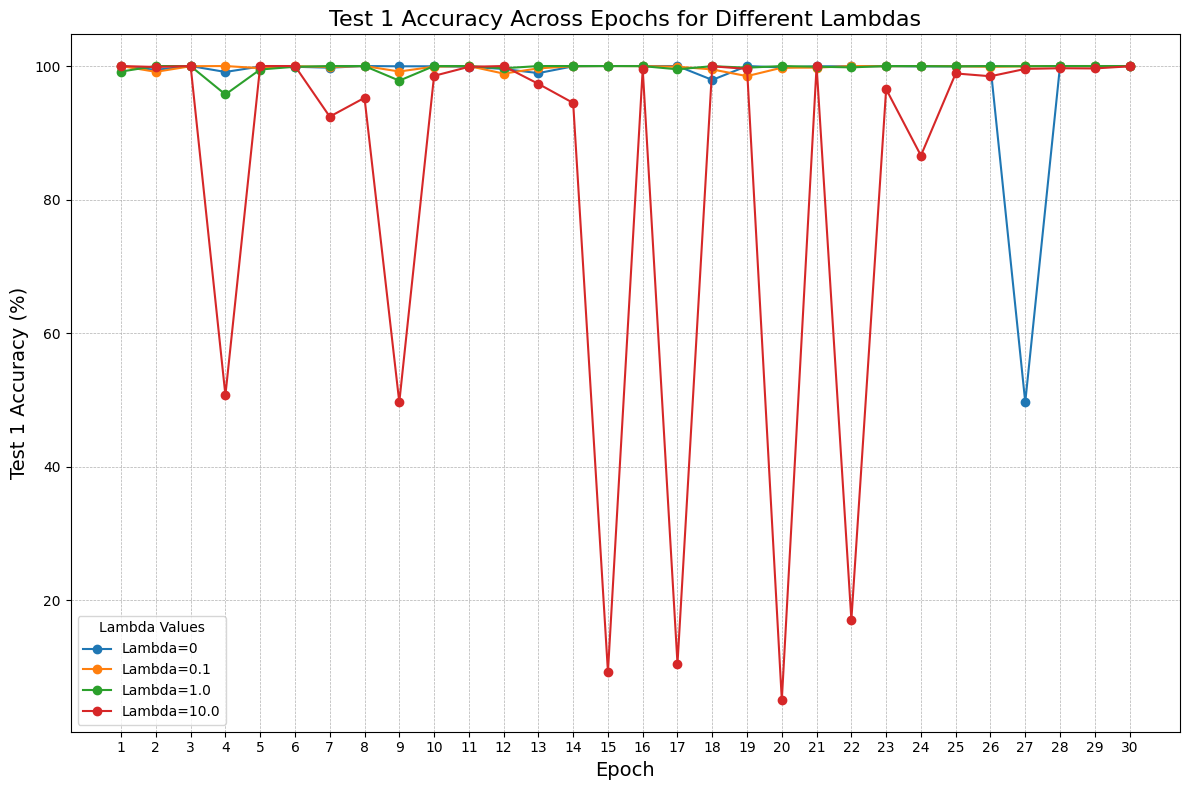

In [5]:
lambdas_data = x.split("Lambda=")
lambdas_data = lambdas_data[1:] 

lambda_accuracy_data = {}

for lambda_section in lambdas_data:
    lines = lambda_section.split('\n')
    lambda_value = lines[0].strip()
    epochs_data = []
    
    for line in lines[1:]:
        if line.strip():
            match = re.search(r"epoch: (\d+), .*?train_accuracy: (\d+\.\d+), test1_accuracy: (\d+\.\d+), test2_accuracy: (\d+\.\d+)", line)
            if match:
                epoch = int(match.group(1))
                test2_acc = float(match.group(3))
                epochs_data.append((epoch, test2_acc))
    
    lambda_accuracy_data[lambda_value] = epochs_data

plt.figure(figsize=(12, 8))
for lambda_value, epochs_data in lambda_accuracy_data.items():
    epochs, test2_accs = zip(*epochs_data)
    plt.plot(epochs, test2_accs, label=f'Lambda={lambda_value}', marker='o')

plt.title('Test 1 Accuracy Across Epochs for Different Lambdas', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Test 1 Accuracy (%)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Lambda Values")
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1)) 
plt.tight_layout()

# save figure as png
plt.savefig('synthx.png')
plt.show()